# Evaluate

Can seasonal forecasts be used as 'alternate' realities? Here we show how a set of evaluation metrics can be used to answer this question. The evaluation metrics are available through an [R package](https://github.com/timokelder/UNSEEN) for easy evaluation of the UNSEEN ensemble. Here, we illustrate how this package can be used in the UNSEEN workflow.  We will evaluate the generated UNSEEN ensemble of UK February precipitation and of MAM Siberian heatwaves. 

<div class="alert alert-info">

Note

We switch to R since we believe R has a better functionality in extreme value statistics. 

</div>

### Set up

First, we set the working directory to the UNSEEN-open directory, then we load the UNSEEN and lubridate package. We need lubridate to convert the time class from character to Date.

In [1]:
setwd('../../..')
getwd()

[1] "/lustre/soge1/projects/ls/personal/timo/UNSEEN-open"

In [2]:
library(UNSEEN)

### Read the data and convert the time column
The data that is imported here are the files stored at the end of step 1: Download, see for example [1.5](https://nbviewer.jupyter.org/github/esowc/UNSEEN-open/blob/master/Notebooks/1.Download/1.5Upscale.ipynb).


In [4]:
EOBS_UK_weighted_df <- read.csv("Data/EOBS_UK_weighted_upscaled.csv", stringsAsFactors=FALSE)
SEAS5_UK_weighted_df <- read.csv("Data/SEAS5_UK_weighted_masked.csv", stringsAsFactors=FALSE)

In [5]:
head(EOBS_UK_weighted_df)
head(SEAS5_UK_weighted_df)

,time,rr
,<chr>,<dbl>
1,1950-02-28,4.127258
2,1951-02-28,3.250735
3,1952-02-29,1.071549
4,1953-02-28,1.592504
5,1954-02-28,2.590117
6,1955-02-28,2.194608


,leadtime,number,time,tprate
,<int>,<int>,<chr>,<dbl>
1,2,0,1982-02-01,1.619839
2,2,0,1983-02-01,2.929800
3,2,0,1984-02-01,3.272816
4,2,0,1985-02-01,2.000030
5,2,0,1986-02-01,3.313016
6,2,0,1987-02-01,5.247035


And then convert the time class to Date format, with the ymd function in lubridate:

In [5]:
EOBS_UK_weighted_df$time <- lubridate::ymd(EOBS_UK_weighted_df$time)
str(EOBS_UK_weighted_df)

SEAS5_UK_weighted_df$time <- lubridate::ymd(SEAS5_UK_weighted_df$time)
str(SEAS5_UK_weighted_df)

'data.frame':	71 obs. of  2 variables:
 $ time: Date, format: "1950-02-28" "1951-02-28" ...
 $ rr  : num  4.13 3.25 1.07 1.59 2.59 ...
'data.frame':	4375 obs. of  4 variables:
 $ leadtime: int  2 2 2 2 2 2 2 2 2 2 ...
 $ number  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ time    : Date, format: "1982-02-01" "1983-02-01" ...
 $ tprate  : num  1.62 2.93 3.27 2 3.31 ...


## Timeseries

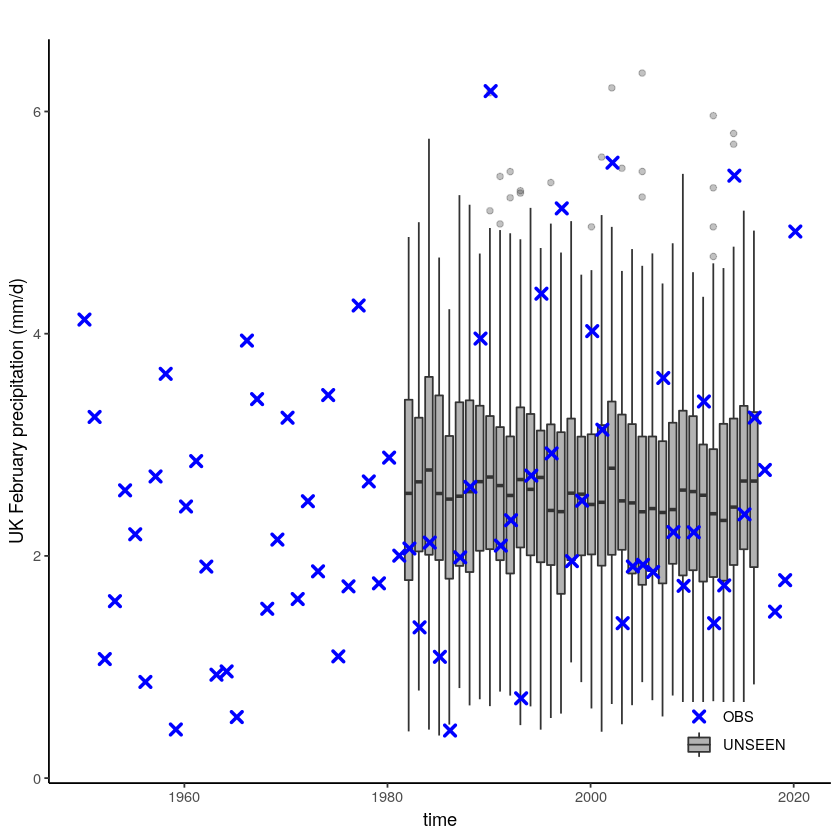

In [6]:
unseen_timeseries(ensemble = SEAS5_UK_weighted_df, obs = EOBS_UK_weighted_df, ylab = 'UK February precipitation (mm/d)')

Call the documentation of the function with `?unseen_timeseries`

## Independence

Warning message:
“Removed 1625 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1625 rows containing non-finite values (stat_boxplot).”


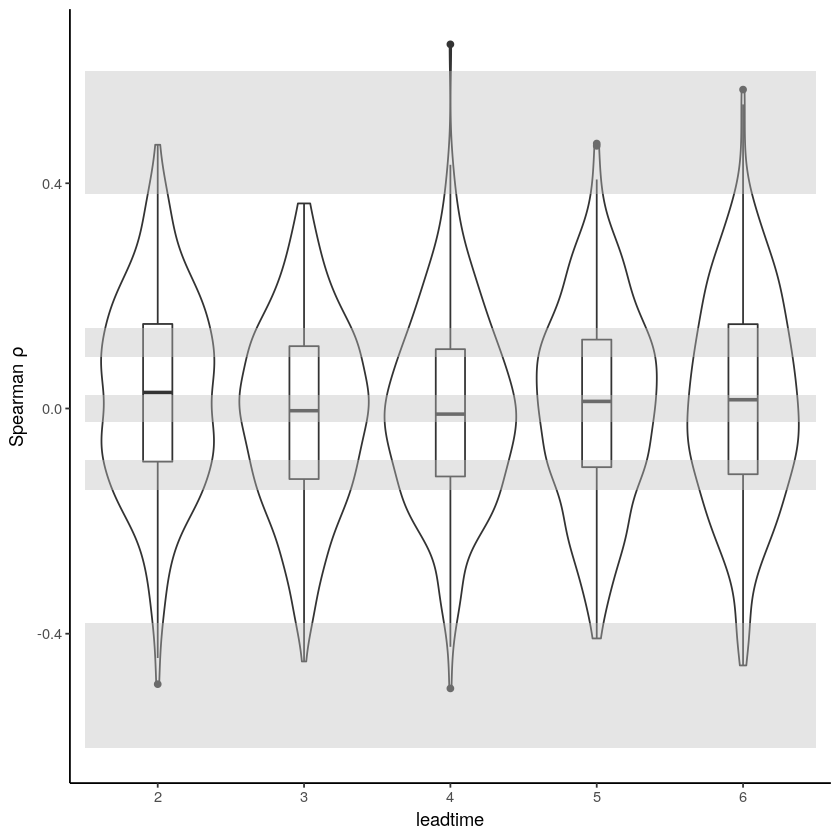

In [7]:
independence_test(ensemble = SEAS5_UK)

## Stability

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


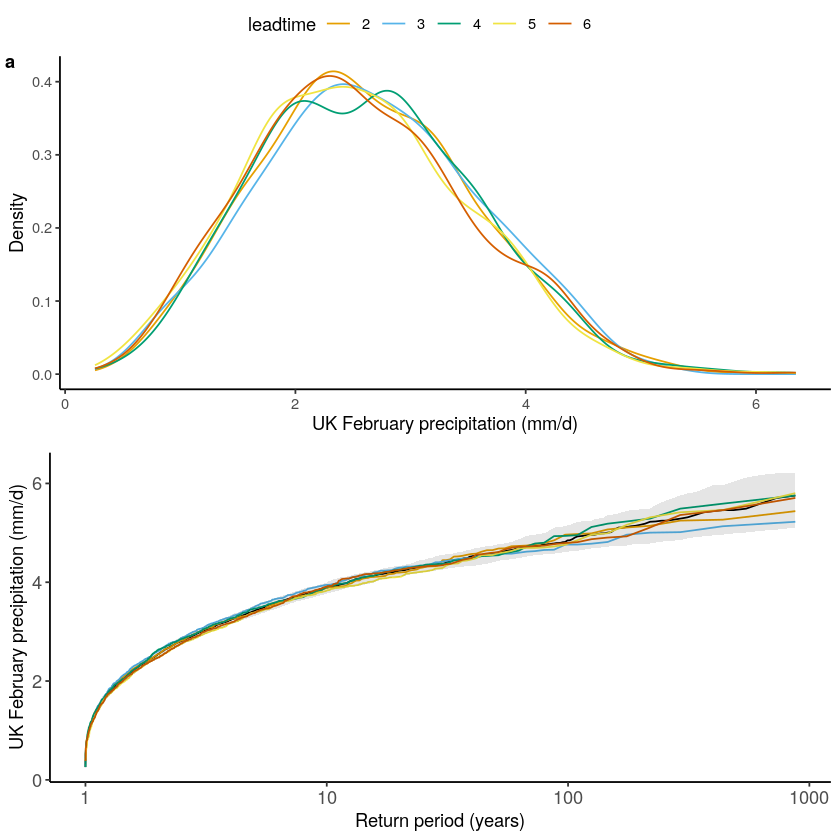

In [8]:
stability_test(ensemble = SEAS5_UK, lab = 'UK February precipitation (mm/d)')

## Fidelity

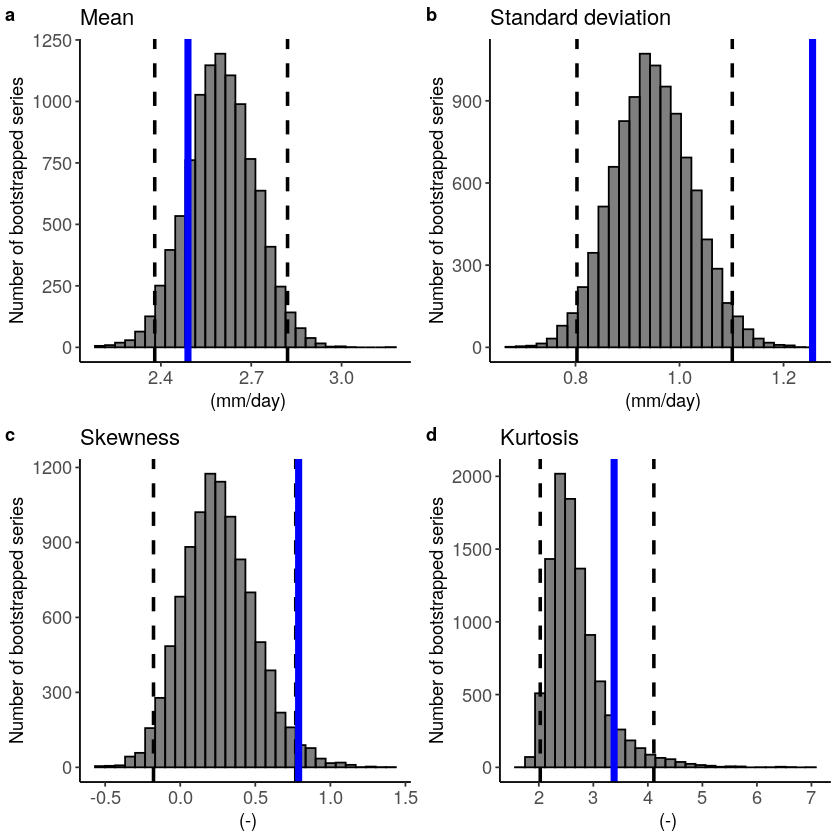

In [9]:
fidelity_test(obs = EOBS_UK$rr, ensemble = SEAS5_UK$tprate)

To include a mean-bias correction, set `biascor = TRUE`:

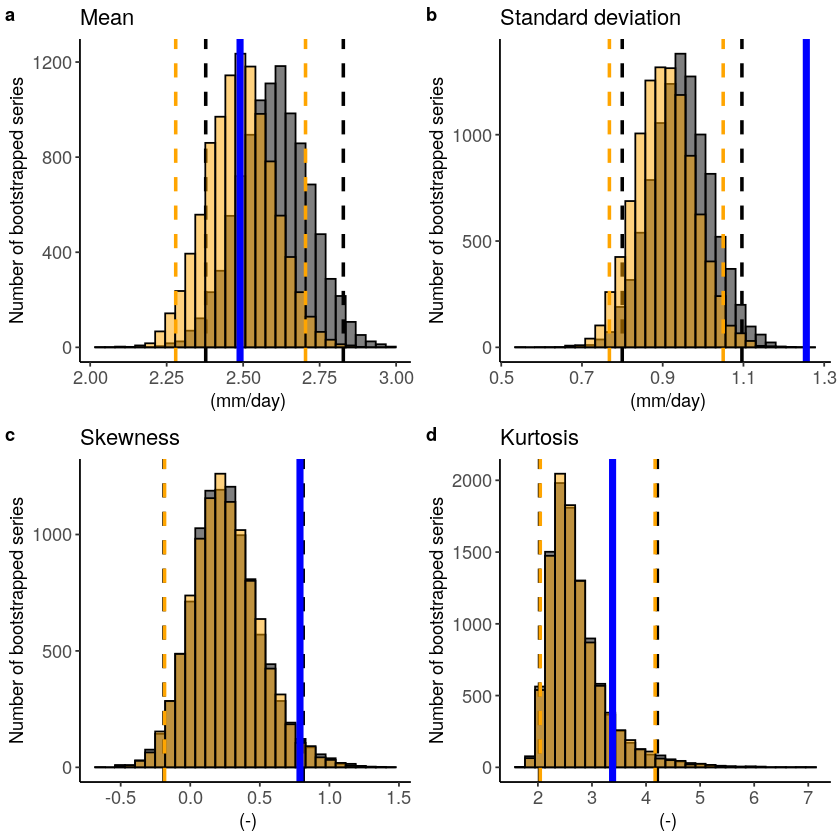

In [10]:
fidelity_test(obs = EOBS_UK$rr, ensemble = SEAS5_UK$tprate, biascor = TRUE)

In [16]:
?fidelity_test